In [1]:
# Dependencies
import tweepy
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys

consumer_key = "PrGevwVABchoG0o589r9BPTPM"
consumer_secret = "wUJAaOLJdNgE2WIewNPYhhsqazrRCdSplJmwqqAm7Wh6pNejE8"
access_token = "905540398994612227-t60QDxW0jHuOXAlPSTteYE1CyO6CMAZ"
access_token_secret = "BdTYVNH6m2dUtkrFAf6PQyHuh22WD0U0r3onfivP7yjr7"


# Setup Tweepy API Authentication

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
# Array to hold sentiment
sentiments = []

target_terms = ("@bbcnews", "@cbsnews", "@cnn",
                "@foxnews", "@nytimes")

counter = 1

In [3]:
# Loop through all target users
for target in target_terms:

    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    
    # Loop through 1 time for total 100 tweets each
    for x in range(1):

        # Get all tweets from home feed
        public_tweets = api.search(target, count = 100, result_type="recent")

        # Loop through tweets
        for tweet in public_tweets["statuses"]:


            # Print Tweets
            print("Tweet %s: %s" % (counter, tweet["text"]))

            # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            tweets_ago = counter


            # Add sentiments for each tweet into an array
            # append data from each tweet into a sentiments dictionary/array
            sentiments.append({"Screen Name": target,
                             "Date": tweet["created_at"],
                             "Compound": compound,
                             "Positive": pos,
                             "Negative": neg,
                             "Neutral": neu,
                             "Tweets Ago": counter})

            if counter < 100:
                counter += 1
            else:
                counter = 1

sentiments

Tweet 1: @WithoutBollocks @BBCNews Yes Great Britain, America is coming to its senses .
Tweet 2: RT @BBCNews: Cold weather and loneliness 'lethal in winter' https://t.co/haCjb2owaM
Tweet 3: RT @BBCNews: Cold weather and loneliness 'lethal in winter' https://t.co/haCjb2owaM
Tweet 4: @vidhu_vicky @PTI_News @NewsNationTV @FoxNews @ogecebel @BBCWorld @BBCNews @POTUS @BarackObama @UNHumanRights… https://t.co/ppoVgYMDQ4
Tweet 5: RT @BBCNews: Birstall house explosion: Woman dies in hospital https://t.co/bbm3Kku8up
Tweet 6: @BBCNorthAmerica @BBCNews And Frasier goes down!
Tweet 7: RT @BBCNews: Wednesday’s Daily Mirror: "Baby Girl Born With Heart Outside Her Body" #bbcpapers #tomorrowspaperstoday (via @AllieHBNews) htt…
Tweet 8: RT @BBCNews: York Council refuses Uber licence renewal https://t.co/0pkr03NFtY
Tweet 9: RT @BBCNews: Cold weather and loneliness 'lethal in winter' https://t.co/haCjb2owaM
Tweet 10: RT: @bbcnews :Spurs player in global teacher prize shortlist https://t.co/82HEQogyQ3
Twe

Tweet 100: RT @CBSNews: MORE: Democratic candidate Doug Jones tweets "Thank you ALABAMA!!"; Senate race remains too close to call for CBS News project…
Tweet 1: @notmy45pres @CBSNews Republicans are still in control bitch! https://t.co/QFv0eeqQOp
Tweet 2: @SonofLiberty357 @CBSNews @PaulaReidCBS ""Jesus. You should read this. And Trump should go f himself."" There's more dirt than texts to come
Tweet 3: @CNN @CBSNews @realDonaldTrump #AlabamaRestoredFaithInTheUnitedStates
Tweet 4: RT @BillRehkopf: Note: @CBSNews still characterizing the race as close. Stay tuned... https://t.co/lm2Lcxpxgb
Tweet 5: RT @CBSNews: Alabama Senate race between Doug Jones and Roy Moore remains too close to call for CBS News projection; live coverage continue…
Tweet 6: RT @BillRehkopf: Note: @CBSNews still characterizing the race as close. Stay tuned... https://t.co/lm2Lcxpxgb
Tweet 7: RT @LoreleiKing9: @CBSNews White women love pedophiles and sexual assaulted. Their new religion is white supremacy.
Tweet 8: RT

Tweet 100: RT @CNN: Democrat Doug Jones will win the Senate special election in Alabama, CNN projects, in a defeat for Republican Roy Moore https://t.…
Tweet 1: RT @CNN: Bakari Sellers: "The raw emotion of victory on election night is something Democrats have not heard in a long time. ... You just e…
Tweet 2: @CNN how can you have a piece of shit lying scum like Rick Santorum at your network, it’s one of the reasons I watc… https://t.co/812wFOTiNe
Tweet 3: @CNN He didn't win...Moore gave it away!
Tweet 4: RT @CNN: BREAKING: Democrat Doug Jones will win the Senate special election in Alabama, CNN projects https://t.co/BARA8oQvDR https://t.co/V…
Tweet 5: Wtf is Santorum doing on @CNN
Tweet 6: RT @CNN: Bakari Sellers: "The raw emotion of victory on election night is something Democrats have not heard in a long time. ... You just e…
Tweet 7: @pave2914 @NIVIsa4031 @michellemalkin @CNN #ClintonNewsNet
Tweet 8: @brianstelter @JenGranholm @RickSantorum @Bakari_Sellers @CNN 2 years is all u got

Tweet 100: I am thoroughly enjoying the salty tears of @FoxNews right now https://t.co/0bWSPpqyud
Tweet 1: RT @ShannonBream: Our @FoxNews producer @JakeBGibson has obtained 10K texts between Peter Strzok and Lisa Page
Tweet 2: RT @ShannonBream: Our @FoxNews producer @JakeBGibson has obtained 10K texts between Peter Strzok and Lisa Page
Tweet 3: RT @BretBaier: .@FoxNews can now project that #DougJones will defeat Republican #RoyMoore to become the first Alabama Democrat in a quarter…
Tweet 4: @GNothem @ShannonBream @FoxNews @foxnewsnight High.ground?  You just ran a pedophile.
Tweet 5: @Modmom1953 @ShannonBream @FoxNews @foxnewsnight And here come the conspiracies!!  Lol
Tweet 6: @hardbrew @Spaniard8888 @Alan_Anguish68 @Mechanoid1990 @nellienola @FoxNews The people have spoken and your version… https://t.co/cvxOHdgmlz
Tweet 7: 10:47pm, @MSNBC finally calls the race, well after @FoxNews &amp; @AP
Tweet 8: RT @CharlieSpeers13: @Ducky661 @DFH1067 @VP @POTUS @FoxNews @OOIDA @JaySekulow can 

Tweet 100: RT @nytimes: Breaking News: The Democrat Doug Jones won in Alabama. The upset trims the GOP Senate majority to 1 and is a snub of President…
Tweet 1: RT @nytimes: Alabama election live results https://t.co/vWLwD7wtYl
Tweet 2: RT @pwcdanica: As @nytimes calls AL-SEN for @GDouglasJones, I'm sure Doug would happily acknowledge the work of his staff &amp; thousands of vo…
Tweet 3: RT @stevensantos: Maybe the @nytimes should send their reporters to interview working class Black voters in Alabama diners.
Tweet 4: RT @nytimes: Breaking News: The Democrat Doug Jones won in Alabama. The upset trims the GOP Senate majority to 1 and is a snub of President…
Tweet 5: RT @nytimes: Breaking News: The Democrat Doug Jones won in Alabama. The upset trims the GOP Senate majority to 1 and is a snub of President…
Tweet 6: RT @nytimes: Breaking News: The Democrat Doug Jones won in Alabama. The upset trims the GOP Senate majority to 1 and is a snub of President…
Tweet 7: RT @stevensantos: Maybe th

[{'Compound': 0.7783,
  'Date': 'Wed Dec 13 03:48:10 +0000 2017',
  'Negative': 0.0,
  'Neutral': 0.57,
  'Positive': 0.43,
  'Screen Name': '@bbcnews',
  'Tweets Ago': 1},
 {'Compound': -0.4215,
  'Date': 'Wed Dec 13 03:48:04 +0000 2017',
  'Negative': 0.237,
  'Neutral': 0.763,
  'Positive': 0.0,
  'Screen Name': '@bbcnews',
  'Tweets Ago': 2},
 {'Compound': -0.4215,
  'Date': 'Wed Dec 13 03:47:49 +0000 2017',
  'Negative': 0.237,
  'Neutral': 0.763,
  'Positive': 0.0,
  'Screen Name': '@bbcnews',
  'Tweets Ago': 3},
 {'Compound': 0.0,
  'Date': 'Wed Dec 13 03:47:48 +0000 2017',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Screen Name': '@bbcnews',
  'Tweets Ago': 4},
 {'Compound': 0.0,
  'Date': 'Wed Dec 13 03:47:19 +0000 2017',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Screen Name': '@bbcnews',
  'Tweets Ago': 5},
 {'Compound': 0.0,
  'Date': 'Wed Dec 13 03:47:11 +0000 2017',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Screen Name': '@b

In [72]:
sentimentDF = pd.DataFrame.from_dict(sentiments)
sentimentDF.to_csv("news_tweets_sentiments.csv", encoding="utf-8", index=False)
sentimentDF

,Compound,Date,Negative,Neutral,Positive,Screen Name,Tweets Ago
0,0.7783,Wed Dec 13 03:48:10 +0000 2017,0.000,0.570,0.430,@bbcnews,1
1,-0.4215,Wed Dec 13 03:48:04 +0000 2017,0.237,0.763,0.000,@bbcnews,2
2,-0.4215,Wed Dec 13 03:47:49 +0000 2017,0.237,0.763,0.000,@bbcnews,3
3,0.0000,Wed Dec 13 03:47:48 +0000 2017,0.000,1.000,0.000,@bbcnews,4
4,0.0000,Wed Dec 13 03:47:19 +0000 2017,0.000,1.000,0.000,@bbcnews,5
5,0.0000,Wed Dec 13 03:47:11 +0000 2017,0.000,1.000,0.000,@bbcnews,6
6,0.0000,Wed Dec 13 03:46:42 +0000 2017,0.000,1.000,0.000,@bbcnews,7
7,0.0000,Wed Dec 13 03:46:40 +0000 2017,0.000,1.000,0.000,@bbcnews,8
8,-0.4215,Wed Dec 13 03:46:33 +0000 2017,0.237,0.763,0.000,@bbcnews,9
9,0.5106,Wed Dec 13 03:45:11 +0000 2017,0.000,0.732,0.268,@bbcnews,10


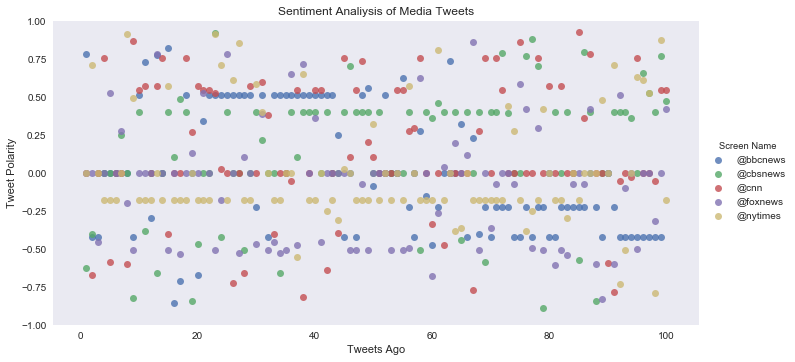

In [69]:
sns.lmplot(x="Tweets Ago", y = "Compound", data = sentimentDF,  hue = "Screen Name", size = 5, fit_reg = False, aspect=2)
plt.title("Sentiment Analiysis of Media Tweets")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.grid()
plt.ylim(ymax = 1, ymin = -1)
plt.savefig("MediaSentimentScatterPlot.png")
plt.show()

In [6]:
Mean = pd.DataFrame(sentimentDF.groupby(sentimentDF["Screen Name"]).mean())
# df['preTestScore'].groupby([df['regiment'], df['company']]).mean()
MeanDF= Mean.reset_index()

MeanDF



,Screen Name,Compound,Negative,Neutral,Positive,Tweets Ago
0,@bbcnews,0.014895,0.124556,0.743707,0.131727,50.0
1,@cbsnews,0.131278,0.044130,0.859390,0.096490,50.5
2,@cnn,0.152897,0.064330,0.818470,0.117180,50.5
3,@foxnews,-0.079845,0.086560,0.841900,0.071520,50.5
4,@nytimes,0.016202,0.105130,0.773180,0.121690,50.5


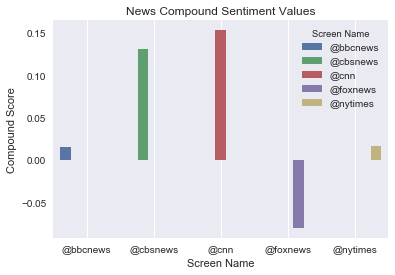

In [66]:
objects = MeanDF["Screen Name"]
x_axis = np.arange(len(objects))
performance = MeanDF["Compound"]

sns.set_context(rc={"figure.figsize": (8, 4)})
fig = sns.barplot(x=objects,y=performance, hue=objects)
plt.ylabel("Compound Score")
plt.title("News Compound Sentiment Values")
plt.grid()
plt.savefig("MediaSentimentBarChart.png")
plt.show()

## Observations
* I happened to run my sentiment analysis for these about 30 minutes after the Alabama Special elections results were revealed. It's fascinating seeing the compound sentiment values in this time frame from the major news groups. CNN and CBS are overwhelmingly positive where as Fox News is the only negative outlet.
* The overall sentiment for each show's the general bias of each news outlet and their responses to a Democrat winning. CNN and CBS put out positive news and tweets and Fox put out negative and disparaging tweets after their backed candidate lost.
* We can also see from the scatter plot that BBCNews started off negative but turned positive towards the end when the Democratic candidate pulled out the win.
* NYtimes don't really have a clear pattern as they are slightly overall positive but also have a lot of negative sentiments.
* Running these sentiments around the time of major events can help portray a great picture of how news is being received. It would be great to run this again at the time of another election, major natural disaster, or sporting event to see how each news network covers the topic and with what kind of sentiment.